In [63]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DeLL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
dataset = pd.read_csv("C:/Users/DeLL/Dropbox/PC/Downloads/archive (15).zip", 
                      encoding="latin")

# Exploratory Data Analysis and Preprocessing 

In [9]:
dataset.shape

(1599999, 6)

In [16]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
column_names = ['target', 'id','date','flag','user','text']
dataset = pd.read_csv("C:/Users/DeLL/Dropbox/PC/Downloads/archive (15).zip", names=column_names,
                      encoding="latin")

In [19]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
dataset.isnull().sum()


target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

# negative , positive and neutral samples

In [23]:
negative_samples = dataset[dataset["target"]==0]
print(f"Number of negative samples : {len(negative_samples)}\n")
negative_samples.head(5)

Number of negative samples : 800000



,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [24]:
neutral_samples = dataset[dataset["target"]==2]
print(f"Number of neutral samples : {len(neutral_samples)}\n\n")
neutral_samples.head(5)

Number of neutral samples : 0




,target,id,date,flag,user,text


In [25]:
positive_samples = dataset[dataset["target"]==4]
print(f"Number of positive samples {len(positive_samples)}\n\n")
positive_samples.head(5)


Number of positive samples 800000




,target,id,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [26]:
#positive from 4 to 1
dataset.target = dataset.target.replace({4: 1})
dataset[dataset["target"]==1].head()

,target,id,date,flag,user,text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [28]:
# Remove mentions
regex_mentions = r"@[A-Za-z0-9_]+"
# Remove links
regex_links = r"https?://[A-Za-z0-9./]+"
# Remove some special characters
regex_special = r"[^A-Za-z0-9]+"


In [31]:
#Apply preprocessing
# Remove mentions
dataset['text'] = dataset['text'].apply(lambda x: re.sub(regex_mentions, " ", str(x).strip()))
# Remove links 
dataset['text'] = dataset['text'].apply(lambda x: re.sub(regex_links, " ", str(x).strip()))
# Remove special characters
dataset['text'] = dataset['text'].apply(lambda x: re.sub(regex_special, " ", str(x).strip()))
#Show results
dataset.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww that s a bummer You shoulda got David Ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can t update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i h...
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time no see Yes Rains a bit only a bi...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope they didn t have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera


# stemming

In [34]:
#stemming
port_steam = PorterStemmer()
     

def stemming(content):
    stemmer = nltk.SnowballStemmer('english')
    stemmed_content = content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
     

dataset['stemmed_content'] = dataset['text'].apply(stemming) 

dataset.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww that s a bummer You shoulda got David Ca...,awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can t update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...,dive mani time ball manag save 50 rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it s not behaving at all i m mad why am i h...,behav mad see


In [36]:
# separating the data and label
X = dataset['stemmed_content'].values
Y = dataset['target'].values
print(X)

['awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'dive mani time ball manag save 50 rest go bound' ...
 'readi mojo makeov ask detail'
 'happi 38th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday']


In [37]:
print(Y)

[0 0 0 ... 1 1 1]


In [84]:
#Splitting the data to training data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
     
print(X_train)

['watch saw iv drink lil wine' ''
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [85]:
print(Y_train)

[1 1 0 ... 1 1 0]


In [86]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
     



# model building 

In [87]:
#Model Evaluation

def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(Y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(Y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10) 
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76    160000
           1       0.76      0.77      0.77    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



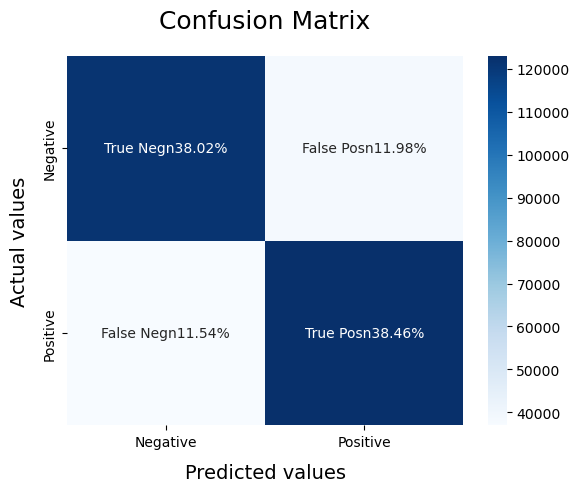

In [62]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    160000
           1       0.76      0.79      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



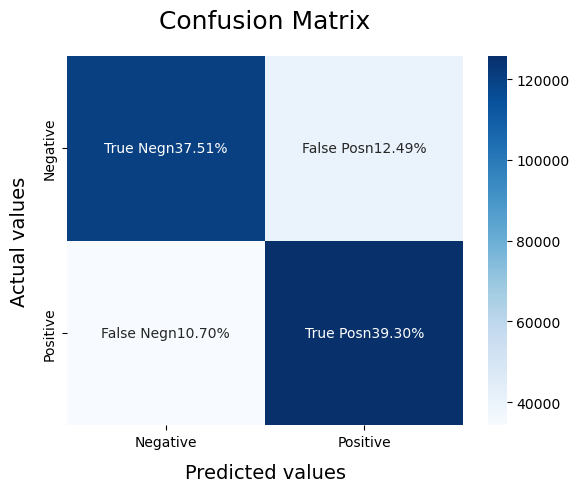

In [64]:
#SVM

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.76      0.79      0.78    160000

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



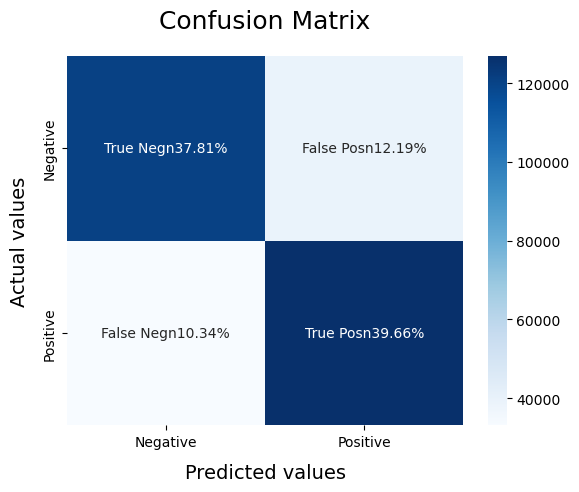

In [92]:
#Logistic Regression

LRmodel = LogisticRegression( max_iter = 1000)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
     

# saving model and testing

In [93]:
#Saving the trained model

import pickle    
filename = 'trained_model.sav'
pickle.dump(LRmodel, open(filename, 'wb'))

In [94]:
#Using Saved Model for future predictions
# loading the saved model
loaded_model = pickle.load(open("C:/Users/DeLL/Dropbox/PC/Downloads/trained_model.sav", 'rb'))

In [99]:
X_new = X_test[80]
print(Y_test[80])

prediction = LRmodel.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

1
[1]
Positive Tweet


In [103]:
# Example new tweet
new_tweet = "I love AI and machine learning!"

# Load the vectorizer and model
vectorizer = joblib.load('vectorizer.pkl')
LRmodel = joblib.load('LRmodel.pkl')

# Preprocess and transform the new tweet
X_new = vectorizer.transform([new_tweet])

# Make the prediction
prediction = LRmodel.predict(X_new)

# Print the prediction
if prediction[0] == 0:
    print('Negative Tweet')
else:
    print('Positive Tweet')


Positive Tweet
